<a href="https://colab.research.google.com/github/Amine-Maniar/Cours-techniques-d-IA/blob/main/Notebook_Modelisation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch

In [ ]:
import torch
import numpy as np

Pytorch est un framework scientifique flexible pour les réseaux de neurones. Sa syntaxe est proche de numpy et permet de coder

## Tenseurs

Les tenseurs sont l'équivalent des numpy arrays pour Pytorch

In [ ]:
v_ones = torch.ones(1, 3)
print(v_ones)

v_zeros = torch.zeros(2, 2)
print(v_zeros)

v_rand = torch.randn(2, 2, 3)
print(v_rand)

tensor([[1., 1., 1.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[[ 1.5861, -0.8751, -0.5112],
         [-0.0886,  1.4688,  1.3692]],

        [[ 0.8940,  1.0894,  0.6519],
         [-0.9150,  0.4022, -1.0637]]])


In [ ]:
#Conversion entre tenseurs et numpy arrays
torch_tensor = torch.randn(5, 5)
numpy_ndarray = torch_tensor.numpy()
back_to_torch = torch.from_numpy(numpy_ndarray)

In [ ]:
a = torch.randn(5, 5)
b = torch.randn(5, 5)
print(a)
print(b)

tensor([[-0.2351, -0.2874, -0.2153,  1.1103, -0.4876],
        [-0.0966, -0.2960, -1.1581, -1.6719,  0.2730],
        [-0.8704,  2.0105,  0.4437,  0.6200,  0.7209],
        [-0.5609,  0.2538,  0.9772,  0.7293, -0.2957],
        [-0.4172,  0.5550, -1.8779,  1.3790, -0.8519]])
tensor([[ 1.2138, -0.4848, -0.3037, -1.2612,  1.8277],
        [-0.6336, -0.4961,  1.0184, -0.0189, -0.4804],
        [ 1.1233,  0.7651, -0.9610,  0.8079,  0.9134],
        [ 1.0076,  0.9817, -0.2585, -0.4448, -0.0517],
        [-0.6330, -0.3729,  0.0183,  0.9651,  0.7188]])


In [ ]:
# Indexation par indices
tenseur_a = a[2, 2]
print(tenseur_a)

# Difference avec numpy : Il faut ajouter .item() pour avoir la valeur à l'intérieur du tenseur
valeurs_a = a[2, 2].item()
print(valeurs_a)

tensor(0.4437)
0.4437190294265747


In [ ]:
# Retourner toute une ligne ou colonne
first_row = a[0, :]
first_column = a[:, 0]
matrice = a[2:4, 2:4]
print(first_row)
print(first_column)
print(matrice)

tensor([-0.2351, -0.2874, -0.2153,  1.1103, -0.4876])
tensor([-0.2351, -0.0966, -0.8704, -0.5609, -0.4172])
tensor([[0.4437, 0.6200],
        [0.9772, 0.7293]])


In [ ]:
# Opérations matricielles

# Addition
c = a + b

# Multiplication élément par élément : c_ij = a_ij * b_ij
c = a * b

# Produit matriciel : c_ik = a_ij * b_jk
c = a.mm(b)
c = torch.mm(a,b)

# Produit vectoriel
c = a.matmul(b[:, 0])

In [ ]:
# Manipulation des dimensions
a = torch.randn(10, 10)
print(a.size())


# Ajouter une dimension à la fin
print(a.unsqueeze(-1).size())

# Au début
print(a.unsqueeze(0).size())

# Au milieu
print(a.unsqueeze(1).size())

# Opération inverse
print(a.unsqueeze(0).squeeze(0).size())

# Créer une vue du tenseur avec des dimensions différentes
print(a.view(100, 1).size())

print(a.view(50, 2).size())

# Copy data across a new dummy dimension!
a = torch.randn(2)
a = a.unsqueeze(-1)
print(a)
print(a.expand(2, 3))
print(a)

torch.Size([10, 10])
torch.Size([10, 10, 1])
torch.Size([1, 10, 10])
torch.Size([10, 1, 10])
torch.Size([10, 10])
torch.Size([100, 1])
torch.Size([50, 2])
tensor([[1.1257],
        [2.1949]])
tensor([[1.1257, 1.1257, 1.1257],
        [2.1949, 2.1949, 2.1949]])
tensor([[1.1257],
        [2.1949]])


## Autograd

In [ ]:
# La particularité principale des tenseurs est qu'ils se rappellent des gradients
x = torch.randn(1, requires_grad=True)
print(x)

tensor([0.5587], requires_grad=True)


In [ ]:
# Au début, le paramètre est vide
print(x.grad)

None


In [ ]:
y = x.exp()
print(y)

tensor([1.7483], grad_fn=<ExpBackward0>)


In [ ]:
y.backward()
print(x.grad)
print(y)

tensor([1.7483])
tensor([1.7483], grad_fn=<ExpBackward0>)


In [ ]:
# Compute another thingy with x.
z = x * 2
z.backward()

# Should be 2! But it will be 2 + e^x.
print(x.grad)

tensor([3.7483])


In [ ]:
x_a = torch.randn(1, requires_grad=True)
x_b = torch.randn(1, requires_grad=True)
x = x_a * x_b
x1 = x ** 2
x2 = 1 / x1
x3 = x2.exp()
x4 = 1 + x3
x5 = x4.log()
x6 = x5 ** (1/3)
x6.backward()
print(x_a.grad)
print(x_b.grad)


x = torch.randn(1, requires_grad=True)
y = torch.tanh(x)
y.backward()
print(x.grad)

tensor([-1.0360])
tensor([2.2581])
tensor([0.7917])


In [ ]:
a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

b = w1*a
c = w2*a

d = w3*b + w4*c

L = 10 - d


print("Le gradient de a est : ", a.grad_fn)
print("Le gradient de d est : ", d.grad_fn)


Le gradient de a est :  None
Le gradient de d est :  <AddBackward0 object at 0x7cf8d94397e0>


In [ ]:
a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

b = w1*a
c = w2*a

d = w3*b + w4*c

L = 10 - d

L = (10 - d).sum()

L.backward()

In [ ]:
# Mise à jour des poids
learning_rate = 0.1
w1 = w1 - learning_rate * w1.grad

# Exemples

## Perceptron multi-couches

In [ ]:
%matplotlib inline
import torch # Fonctions de création de tenseurs et les opérations sur les tenseurs
import torch.nn as nn # Les couches de réseau de neurones
import torch.nn.functional as F # Version des couches de NN utilisable comme des fonctions
import torch.optim as optim # Contient les optimiseurs pour l'apprentissage

In [ ]:
n = 1000
X = torch.rand(n, 2) * 3 - 1.5

print(X[:10]) # 10 élements
print(X[0]) # Première ligne
print(X[:,0]) # Première colonne
print(X[0,1]) # Element aux indices 0,1

In [ ]:
print(X.size())
print(X.size(1))
print(X.shape)
print(X.shape[1])

torch.Size([1000, 2])
2
torch.Size([1000, 2])
2


In [ ]:
# Problème à résoudre : Un point x de coordonnées x0,x1 est-il dans le disque centrée sur l'origine de rayon 1 ?

#x aura pour étiquette 1 si x0**2+x1**2<1, 0 sinon.

Y = X[:,0] ** 2 + X[:,1] ** 2 < 1
Y = Y.long()
Y[:10]

tensor([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

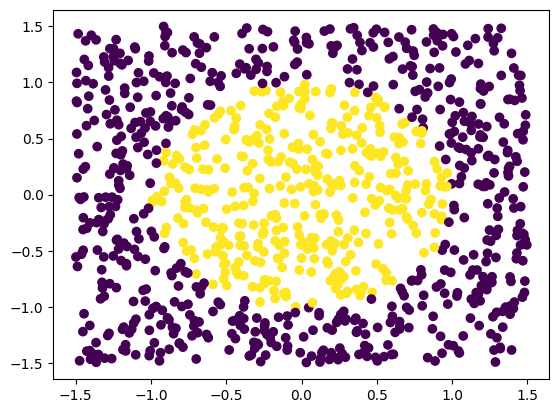

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [ ]:
# On crée un modèle linéaire y = W*x + b

# 2 paramètres : Dimension du vecteur d'entrée (X a 2 coordonnées) et Dimension du vecteur de sortie (2 étiquettes possible (0,1))

# Les poids W et le biais b sont initialisés lde façon aléatoire

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 2)
    def forward(self, x):
        return self.l1(x)


# dans ce cas, model = nn.Linear(2, 2) est identique à notre modèle
model = LinearModel(x)
model

LinearModel(
  (l1): Linear(in_features=2, out_features=2, bias=True)
)

In [ ]:
model(X[0])

tensor([-0.1393, -0.4117], grad_fn=<ViewBackward0>)

In [ ]:
print(model.l1.weight)
print(model.l1.bias)

Parameter containing:
tensor([[ 0.3645, -0.2397],
        [ 0.6958,  0.1682]], requires_grad=True)
Parameter containing:
tensor([-0.0607,  0.3359], requires_grad=True)


In [ ]:
print(X[:3])
model(X[:3])

tensor([[-0.8436, -0.9552],
        [ 1.3149,  0.6887],
        [-0.0316,  0.2274]])


tensor([[-0.1393, -0.4117],
        [ 0.2535,  1.3666],
        [-0.1268,  0.3522]], grad_fn=<AddmmBackward0>)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_set = TensorDataset(X, Y)
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)

In [ ]:
def fit(model, epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    for epoch in range(epochs):
        total_loss = 0
        num = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            y_scores = model(x)
            loss = criterion(y_scores, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            num += len(y)
        if epoch % (epochs // 10) == 0:
            print(epoch, total_loss / num)

In [ ]:
# Entrainement
fit(model, 50)

0 0.1862693561911583
5 0.1639138101041317
10 0.1635564265847206
15 0.16361048033833503
20 0.16357758355140686
25 0.16359049743413925
30 0.16361165523529053
35 0.16357786151766776
40 0.1635642239153385
45 0.16356746184825896


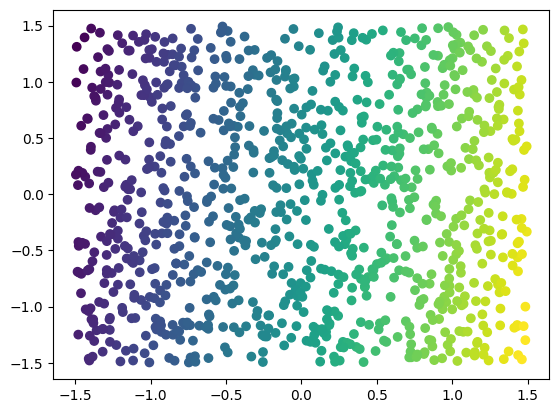

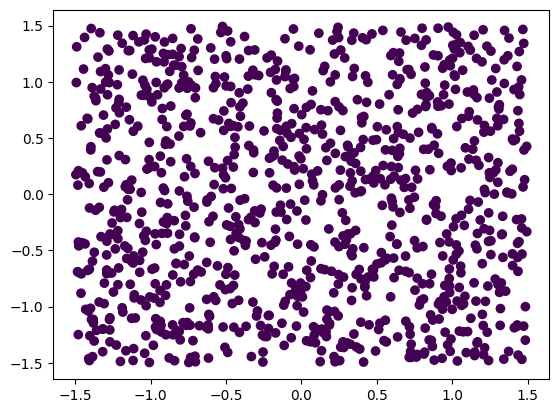

In [ ]:
# Validation
X_val = torch.rand(n, 2) * 3 - 1.5
Y_score = model(X_val)
Y_pred = torch.max(Y_score, 1)[1]

plt.scatter(X_val[:,0], X_val[:,1], c=Y_score[:,0].data)
plt.show()

plt.scatter(X_val[:,0], X_val[:,1], c=Y_pred.data)
plt.show()

In [ ]:
# Pour obtenir un meilleur classifieur, on utilise un perceptron multicouche

class MultiLayerPerceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 10)
        self.l2 = nn.Linear(10, 2)
    def forward(self, x):
        return self.l2(torch.tanh(self.l1(x)))

mlp = MultiLayerPerceptron()
mlp

MultiLayerPerceptron(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=2, bias=True)
)

In [ ]:
fit(mlp, 50)

0 0.16603366515040396
5 0.1469481918811798
10 0.12060448348522186
15 0.09406321926414966
20 0.07641992457956076
25 0.06501382204145192
30 0.056816752091050145
35 0.05052974214591086
40 0.045770393158309164
45 0.0418718416839838


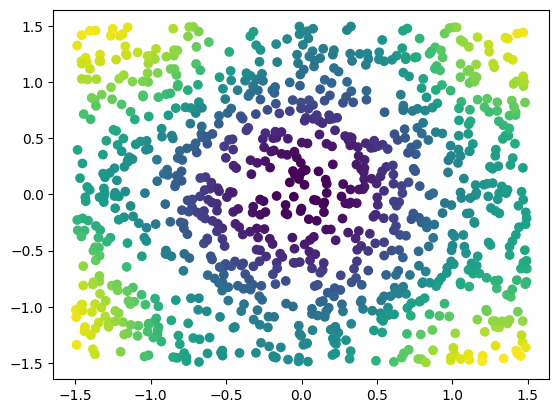

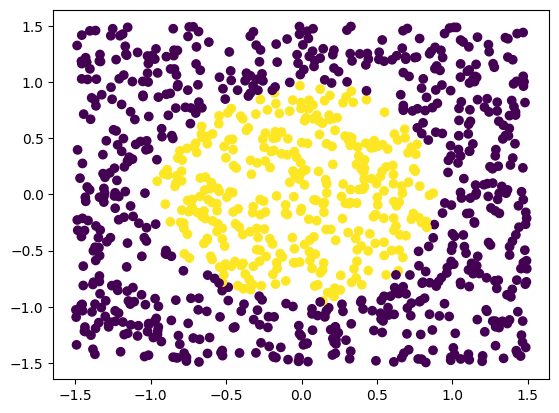

In [ ]:
Y_score = mlp(X_val)
Y_pred = torch.max(Y_score, 1)[1]

plt.scatter(X_val[:,0], X_val[:,1], c=Y_score[:,0].data)
plt.show()

plt.scatter(X_val[:,0], X_val[:,1], c=Y_pred.data)
plt.show()

## Réseau de neurone et descente de gradient manuellement

In [ ]:
import random
import numpy as np

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

Number of examples: 100
Number of features: 2


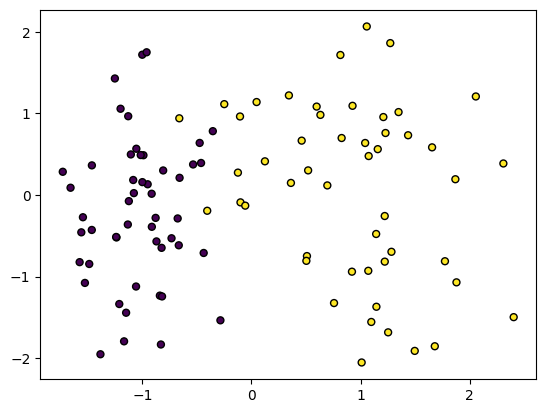

In [ ]:
from sklearn.datasets import make_classification
set_seed(7)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
print('Number of examples: %d' % X.shape[0])
print('Number of features: %d' % X.shape[1])

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
plt.show()

In [ ]:
# Convertir les variables en tenseurs Pytorch
X, Y = torch.from_numpy(X), torch.from_numpy(Y)
X, Y = X.float(), Y.float()

In [ ]:
# Definir les dimensions
num_feats = 2
hidden_size = 100
num_outputs = 1

# Taux d'apprentissage
eta = 0.1
num_steps = 1000

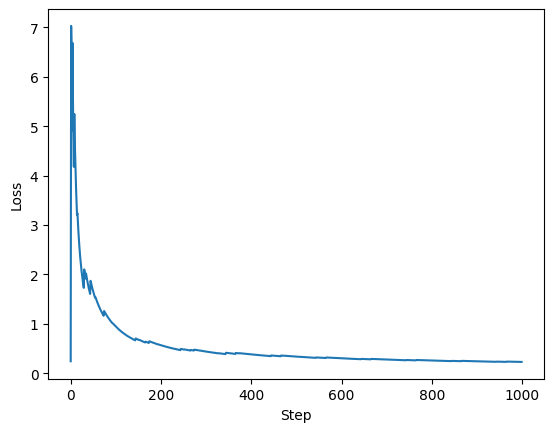

In [ ]:
# Entrée vers couche cachée (intermédiaire)
W1 = torch.randn(hidden_size, num_feats, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

# Couche cachée vers sortie
W2 = torch.randn(num_outputs, hidden_size, requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

# Paramètres entrainables
parameters = [W1, b1, W2, b2]

# Créer une permutation aléatoire
indices = torch.randperm(X.size(0))

# Erreur moyenne
avg_loss = []

# Run (forward et backward)
for step in range(num_steps):
    # Utiliser les permutations pour prendre un échantillon de données aléatoire des x et y
    i = indices[step % indices.size(0)]
    x_i, y_i = X[i], Y[i]

    # Forward pass
    hidden = torch.relu(W1.matmul(x_i) + b1)
    y_hat = torch.sigmoid(W2.matmul(hidden) + b2)

    # Calcul d'erreur (Entropie croisée binaire): -(y_i * log(y_hat) + (1 - y_i) * log(1 - y_hat))
    # Epsilon pour stabilité numérique (les opérations sur les floats avec des logs peuvent parfois avoir des problèmes de précision)
    eps = 1e-6
    loss = -(y_i * (y_hat + eps).log() + (1 - y_i) * (1 - y_hat + eps).log())

    # Calcul de l'erreur moyenne et l'ajouter dans le vecteur avg.loss. Ne pas oublier .item() pour avoir un scalaire et non un tenseur
    if step == 0:
        avg_loss.append(loss.item())
    else:
        old_avg = avg_loss[-1]
        new_avg = (loss.item() + old_avg * len(avg_loss)) / (len(avg_loss) + 1)
        avg_loss.append(new_avg)

    # Remettre les gradients à zéro avant de les recalculer pour la nouvelle itération
    for param in parameters:
        # Vérifier si les gradients existent déjà
        if param.grad is not None:
            param.grad.zero_()

    # Backward pass
    loss.backward()

    # Mise à jour des paramètres
    for param in parameters:
        param.data = param.data - eta * param.grad


plt.plot(range(num_steps), avg_loss)
plt.ylabel('Loss')
plt.xlabel('Step')
plt.show()

## Les couches du réseau de neurone

In [ ]:
import torch.nn as nn

# Linear layer: in_features, out_features
linear = nn.Linear(10, 10)
print(linear)

# Convolution layer: in_channels, out_channels, kernel_size, stride
conv = nn.Conv2d(1, 20, 5, 1)
print(conv)

# RNN: num_inputs, num_hidden, num_layers
rnn = nn.RNN(10, 10, 1)
print(rnn)

Linear(in_features=10, out_features=10, bias=True)
Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
RNN(10, 10)


In [ ]:
print(linear.weight)
print([k for k,v in conv.named_parameters()])

Parameter containing:
tensor([[-0.2087,  0.0624,  0.0927,  0.2812,  0.0016,  0.2136, -0.1054, -0.2304,
         -0.0307,  0.1642],
        [-0.1235, -0.2677, -0.1926,  0.0560,  0.3015,  0.0175, -0.2549, -0.1416,
          0.1605, -0.0995],
        [-0.0427,  0.2353,  0.1162,  0.1936,  0.2839, -0.1041,  0.0458, -0.2373,
          0.3143, -0.2120],
        [ 0.3006,  0.2895,  0.0688, -0.2734, -0.0102, -0.1303,  0.0969,  0.1788,
          0.1761,  0.1016],
        [-0.2423, -0.2660,  0.0934, -0.0694,  0.1478,  0.3073,  0.0955, -0.1904,
         -0.0913,  0.1948],
        [ 0.0300,  0.2156, -0.3031, -0.0390, -0.1542,  0.2403,  0.1383, -0.0424,
         -0.2934, -0.0373],
        [ 0.2564, -0.0085, -0.0131, -0.2924,  0.2504,  0.2616, -0.2541, -0.2243,
          0.0153, -0.1809],
        [-0.2588,  0.0992, -0.0820,  0.1096,  0.1257,  0.2816,  0.1879, -0.2973,
         -0.2548,  0.2535],
        [-0.2687,  0.1933, -0.1927,  0.2537,  0.1788, -0.2183, -0.2614, -0.1386,
         -0.1446, -0.1795

In [ ]:
# Créez un modèle

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 entrée (matrice) pour 20 sorties (sous matrices) obtenues en balayant la matrice de départ avec des noyaux de taille 5x5.
        self.conv1 = nn.Conv2d(1, 20, 5, 1)

        # 20 entrées précédentes pour 50 sorties (sous matrices)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)

        # Les 50 matrices en sortie de la dernière étape sont de taille 4*4. La couche nn.linear n'accepte pas de matrices complètes en entrée mais toutes les données, d'où le 4*4*50
        self.fc1 = nn.Linear(4*4*50, 500)

        # 500 entrées vers 10 sorties (classes) qui correspondent à chaque chiffre entre 0 et 9
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialisez le modèle
model = Net()

In [ ]:
import torch.optim as optim

# Initialiser l'optimizer avec les paramètres du modèle
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Entrainement et Test

In [ ]:
import tqdm
import torch.nn.functional as F

def train(model, train_loader, optimizer, epoch):

    model.train()

    # Erreur
    total_loss = 0

    # Itérer sur le dataset
    for data, target in tqdm.tqdm(train_loader):
        # Remettre les gradients à zéro
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calcul de l'erreur
        loss = F.nll_loss(output, target)

        # Backward pass
        loss.backward()
        total_loss += loss.item()

        # Update
        optimizer.step()

    # Erreur moyenne
    print("Train Epoch: {}\t Loss: {:.6f}".format(epoch, total_loss / len(train_loader)))

In [ ]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
from torchvision import datasets, transforms

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=32, shuffle=True)


for epoch in range(1, 10 + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

100%|██████████| 1875/1875 [01:12<00:00, 25.90it/s]


Train Epoch: 1	 Loss: 0.330469

Test set: Average loss: 0.0879, Accuracy: 9743/10000 (97%)



100%|██████████| 1875/1875 [01:10<00:00, 26.41it/s]


Train Epoch: 2	 Loss: 0.084864

Test set: Average loss: 0.0632, Accuracy: 9806/10000 (98%)



100%|██████████| 1875/1875 [01:09<00:00, 26.99it/s]


Train Epoch: 3	 Loss: 0.060137

Test set: Average loss: 0.0457, Accuracy: 9852/10000 (99%)



100%|██████████| 1875/1875 [01:09<00:00, 27.06it/s]


Train Epoch: 4	 Loss: 0.047299

Test set: Average loss: 0.0398, Accuracy: 9860/10000 (99%)



100%|██████████| 1875/1875 [01:10<00:00, 26.78it/s]


Train Epoch: 5	 Loss: 0.038761

Test set: Average loss: 0.0347, Accuracy: 9892/10000 (99%)



100%|██████████| 1875/1875 [01:10<00:00, 26.74it/s]


Train Epoch: 6	 Loss: 0.033457

Test set: Average loss: 0.0325, Accuracy: 9892/10000 (99%)



100%|██████████| 1875/1875 [01:10<00:00, 26.78it/s]


Train Epoch: 7	 Loss: 0.029002

Test set: Average loss: 0.0305, Accuracy: 9897/10000 (99%)



100%|██████████| 1875/1875 [01:09<00:00, 26.97it/s]


Train Epoch: 8	 Loss: 0.025455

Test set: Average loss: 0.0326, Accuracy: 9893/10000 (99%)



100%|██████████| 1875/1875 [01:09<00:00, 26.99it/s]


Train Epoch: 9	 Loss: 0.022329

Test set: Average loss: 0.0321, Accuracy: 9896/10000 (99%)



100%|██████████| 1875/1875 [01:09<00:00, 27.11it/s]


Train Epoch: 10	 Loss: 0.019973

Test set: Average loss: 0.0290, Accuracy: 9901/10000 (99%)

